<a href="https://colab.research.google.com/github/saurabhkrr/stock-market-prediction/blob/main/arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving NSE-Tata-Global-Beverages-Limited.csv to NSE-Tata-Global-Beverages-Limited.csv


In [ ]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('NSE-Tata-Global-Beverages-Limited.csv')

#print the head
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


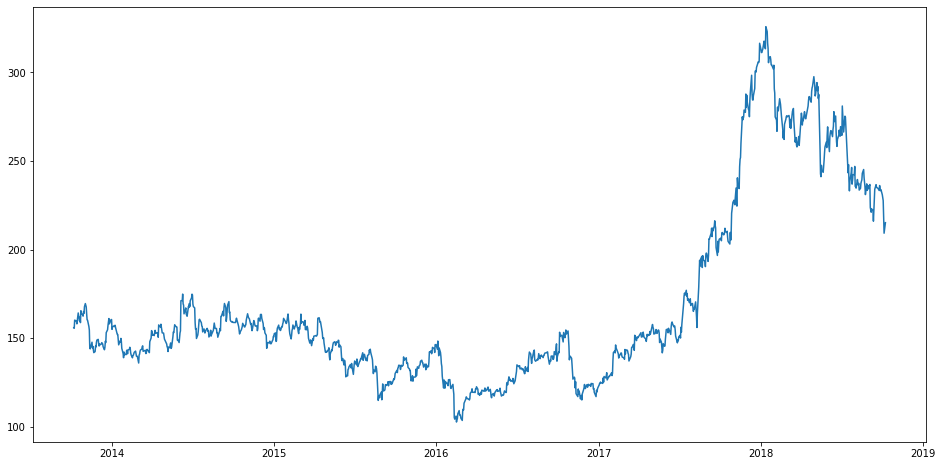

In [ ]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [ ]:
pip install pyramid

In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 3.7MB/s 
     |████████████████████████████████| 9.5MB 45.0MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:


In [ ]:

from pmdarima import auto_arima

data = df.sort_index(ascending=True, axis=0)

train = data[:987]
valid = data[987:]

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=248)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=3.87 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5477.259, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5168.276, Time=0.51 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.96 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=5479.164, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5076.280, Time=1.10 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=8.22 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.85 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5074.398, Time=0.78 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=5166.277, Time=0.31 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=5.02 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=2.17 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=5076.285, Time=1.15 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=5077.935, Time=2.46 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=5076.3

In [ ]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms

54.54322744872866

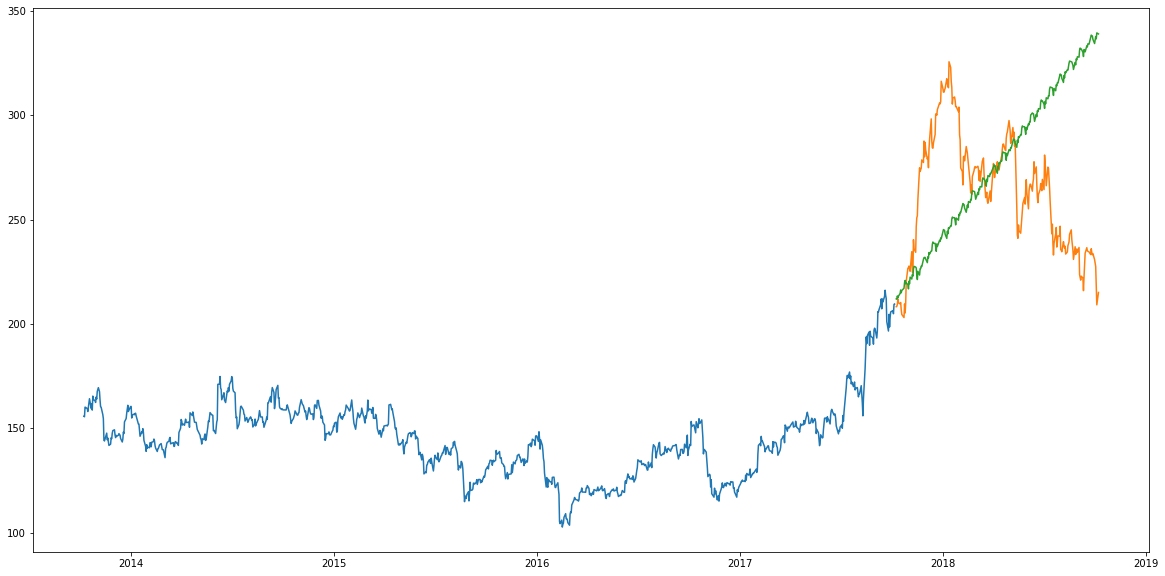

In [ ]:
#plot
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])